In [37]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

In [11]:
df = pd.read_excel('eCO2mix_RTE_energie_M.xlsx')

In [17]:
pd.set_option('display.max_rows', None)

In [18]:
df

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
0,2012-01,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,...,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
1,2012-02,Données définitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,...,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2,2012-03,Données définitives,France,48583,37549.0,5276,1435.0,666,3175,3894,...,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
3,2012-04,Données définitives,France,44192,33100.0,3484,1655.0,486,1343,5302,...,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
4,2012-05,Données définitives,France,40433,29058.0,1772,854.0,368,549,7706,...,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0
5,2012-06,Données définitives,France,37518,26562.0,2219,960.0,384,875,6823,...,437,33219,3648.0,5674.0,2026.0,447.0,482.0,1207.0,599.0,913.0
6,2012-07,Données définitives,France,37910,28818.0,2221,1110.0,437,674,4901,...,513,34141,3216.0,5327.0,2110.0,822.0,494.0,825.0,787.0,287.0
7,2012-08,Données définitives,France,36339,28314.0,2533,1165.0,413,956,3563,...,486,32247,3561.0,5834.0,2273.0,948.0,334.0,610.0,792.0,877.0
8,2012-09,Données définitives,France,38035,30130.0,2450,1382.0,396,671,3641,...,470,33269,4054.0,6036.0,1981.0,1011.0,72.0,790.0,1413.0,769.0
9,2012-10,Données définitives,France,42987,32848.0,3518,2039.0,456,1022,4534,...,450,38628,3625.0,6387.0,2762.0,183.0,-273.0,1621.0,1774.0,321.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Mois                                      1351 non-null   object 
 1   Qualité                                   1351 non-null   object 
 2   Territoire                                1351 non-null   object 
 3   Production totale                         1351 non-null   int64  
 4   Production nucléaire                      866 non-null    float64
 5   Production thermique totale               1351 non-null   int64  
 6   Production thermique charbon              927 non-null    float64
 7   Production thermique fioul                1351 non-null   int64  
 8   Production thermique gaz                  1351 non-null   int64  
 9   Production hydraulique                    1351 non-null   int64  
 10  Production éolien                   

In [14]:
df.describe()

,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production éolien,Production solaire,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
count,1351.000000,866.000000,1351.000000,927.0000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1264.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,7192.846780,8129.209007,537.321244,157.1726,33.084382,395.849001,866.295337,340.541081,120.466321,115.093264,6022.361214,702.919304,6817.500000,2659.232143,930.687500,590.125000,1434.607143,1119.410714,133.598214
std,12009.572892,9881.327676,1067.906306,338.2320,84.714328,803.839839,1591.767488,639.510184,237.691652,185.365765,10622.894494,3152.577294,1487.302952,1032.729158,467.762106,661.926919,428.595472,602.398592,1259.897890
min,92.000000,0.000000,-3.000000,-10.0000,-4.000000,-1.000000,0.000000,1.000000,0.000000,7.000000,0.000000,-7949.000000,0.000000,0.000000,-798.000000,-1005.000000,109.000000,-322.000000,-2912.000000
25%,551.000000,2859.250000,33.000000,0.0000,0.000000,18.000000,5.000000,64.000000,13.000000,35.000000,1809.500000,-1495.000000,6081.750000,2061.250000,744.500000,148.750000,1192.250000,605.750000,-619.750000
50%,3665.000000,5006.500000,173.000000,13.0000,5.000000,125.000000,70.000000,128.000000,34.000000,60.000000,2959.000000,0.000000,7021.000000,2483.000000,1043.500000,532.000000,1477.000000,1180.000000,183.000000
75%,7176.000000,7177.500000,534.000000,174.0000,20.000000,372.500000,853.000000,274.500000,111.000000,92.000000,4519.000000,3594.250000,7832.500000,3291.000000,1270.500000,1068.000000,1745.750000,1566.000000,886.000000
max,58310.000000,43792.000000,8721.000000,2833.0000,1309.000000,5910.000000,8607.000000,5902.000000,1766.000000,883.000000,57406.000000,7928.000000,9468.000000,5453.000000,1907.000000,2021.000000,2272.000000,2235.000000,2642.000000


In [16]:
nan_counts_filtered = df.isna().sum()[df.isna().sum() > 0]
print(nan_counts_filtered)

Production nucléaire                         485
Production thermique charbon                 424
Solde exportateur                             87
Echanges export                             1239
Echanges import                             1239
Echanges avec le Royaume-Uni                1239
Echanges avec l'Espagne                     1239
Echanges avec l'Italie                      1239
Echanges avec la Suisse                     1239
Echanges avec l'Allemagne et la Belgique    1239
dtype: int64


In [21]:
df_clean = df[df['Territoire'] == 'France']

In [22]:
df_clean

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
0,2012-01,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,...,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
1,2012-02,Données définitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,...,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2,2012-03,Données définitives,France,48583,37549.0,5276,1435.0,666,3175,3894,...,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
3,2012-04,Données définitives,France,44192,33100.0,3484,1655.0,486,1343,5302,...,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
4,2012-05,Données définitives,France,40433,29058.0,1772,854.0,368,549,7706,...,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0
5,2012-06,Données définitives,France,37518,26562.0,2219,960.0,384,875,6823,...,437,33219,3648.0,5674.0,2026.0,447.0,482.0,1207.0,599.0,913.0
6,2012-07,Données définitives,France,37910,28818.0,2221,1110.0,437,674,4901,...,513,34141,3216.0,5327.0,2110.0,822.0,494.0,825.0,787.0,287.0
7,2012-08,Données définitives,France,36339,28314.0,2533,1165.0,413,956,3563,...,486,32247,3561.0,5834.0,2273.0,948.0,334.0,610.0,792.0,877.0
8,2012-09,Données définitives,France,38035,30130.0,2450,1382.0,396,671,3641,...,470,33269,4054.0,6036.0,1981.0,1011.0,72.0,790.0,1413.0,769.0
9,2012-10,Données définitives,France,42987,32848.0,3518,2039.0,456,1022,4534,...,450,38628,3625.0,6387.0,2762.0,183.0,-273.0,1621.0,1774.0,321.0


In [23]:
nan_counts_filtered = df_clean.isna().sum()[df_clean.isna().sum() > 0]
print(nan_counts_filtered)

Solde exportateur                           3
Echanges export                             3
Echanges import                             3
Echanges avec le Royaume-Uni                3
Echanges avec l'Espagne                     3
Echanges avec l'Italie                      3
Echanges avec la Suisse                     3
Echanges avec l'Allemagne et la Belgique    3
dtype: int64


In [24]:
lignes_a_supprimer = [1227, 1240, 1253]
data = df_clean.drop(lignes_a_supprimer)

In [25]:
data

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
0,2012-01,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,...,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
1,2012-02,Données définitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,...,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2,2012-03,Données définitives,France,48583,37549.0,5276,1435.0,666,3175,3894,...,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
3,2012-04,Données définitives,France,44192,33100.0,3484,1655.0,486,1343,5302,...,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
4,2012-05,Données définitives,France,40433,29058.0,1772,854.0,368,549,7706,...,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0
5,2012-06,Données définitives,France,37518,26562.0,2219,960.0,384,875,6823,...,437,33219,3648.0,5674.0,2026.0,447.0,482.0,1207.0,599.0,913.0
6,2012-07,Données définitives,France,37910,28818.0,2221,1110.0,437,674,4901,...,513,34141,3216.0,5327.0,2110.0,822.0,494.0,825.0,787.0,287.0
7,2012-08,Données définitives,France,36339,28314.0,2533,1165.0,413,956,3563,...,486,32247,3561.0,5834.0,2273.0,948.0,334.0,610.0,792.0,877.0
8,2012-09,Données définitives,France,38035,30130.0,2450,1382.0,396,671,3641,...,470,33269,4054.0,6036.0,1981.0,1011.0,72.0,790.0,1413.0,769.0
9,2012-10,Données définitives,France,42987,32848.0,3518,2039.0,456,1022,4534,...,450,38628,3625.0,6387.0,2762.0,183.0,-273.0,1621.0,1774.0,321.0


In [26]:
nan_counts_filtered = data.isna().sum()[data.isna().sum() > 0]
print(nan_counts_filtered)

Series([], dtype: int64)


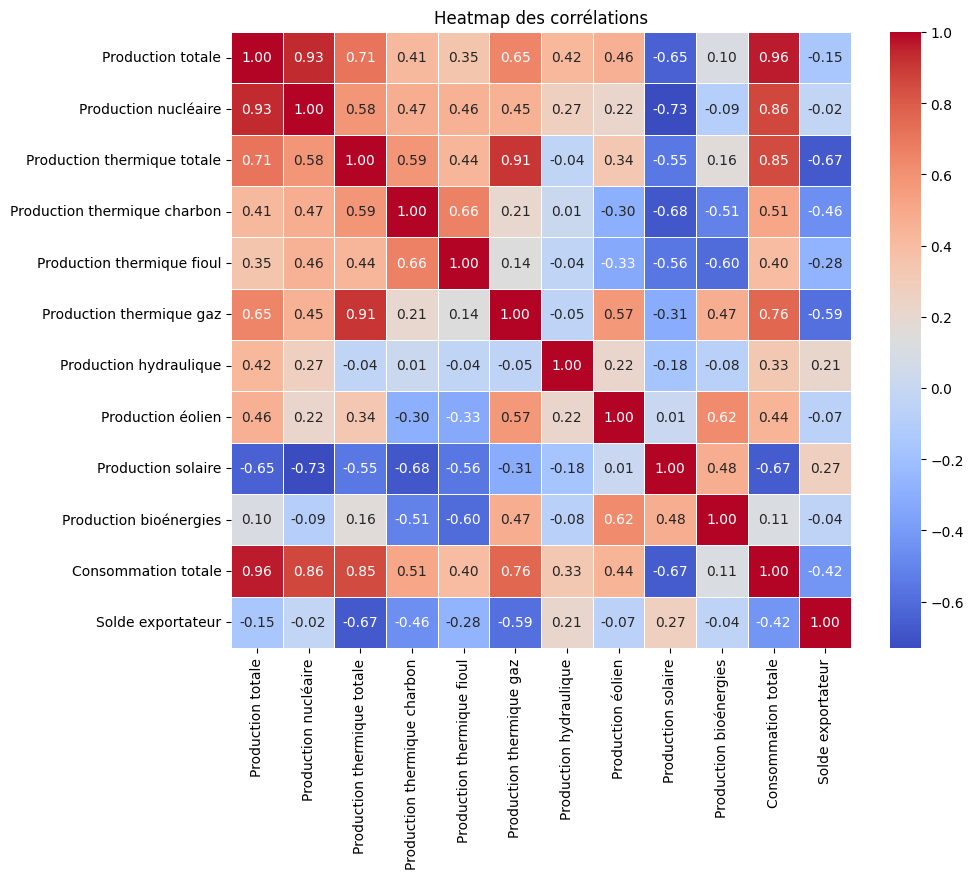

In [42]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap des corrélations')
plt.show()

In [27]:
colonnes_a_supprimer = [
    'Echanges export',
    'Echanges import',
    'Echanges avec le Royaume-Uni',
    'Echanges avec l\'Espagne',
    'Echanges avec l\'Italie',
    'Echanges avec la Suisse',
    'Echanges avec l\'Allemagne et la Belgique'
]

data = data.drop(columns=colonnes_a_supprimer)

In [28]:
data

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production éolien,Production solaire,Production bioénergies,Consommation totale,Solde exportateur
0,2012-01,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,1587,125,514,51086,5371.0
1,2012-02,Données définitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,1123,216,454,54476,-715.0
2,2012-03,Données définitives,France,48583,37549.0,5276,1435.0,666,3175,3894,977,356,531,43156,4888.0
3,2012-04,Données définitives,France,44192,33100.0,3484,1655.0,486,1343,5302,1572,329,405,40176,3447.0
4,2012-05,Données définitives,France,40433,29058.0,1772,854.0,368,549,7706,974,454,469,35257,4425.0
5,2012-06,Données définitives,France,37518,26562.0,2219,960.0,384,875,6823,994,483,437,33219,3648.0
6,2012-07,Données définitives,France,37910,28818.0,2221,1110.0,437,674,4901,912,544,513,34141,3216.0
7,2012-08,Données définitives,France,36339,28314.0,2533,1165.0,413,956,3563,907,536,486,32247,3561.0
8,2012-09,Données définitives,France,38035,30130.0,2450,1382.0,396,671,3641,931,413,470,33269,4054.0
9,2012-10,Données définitives,France,42987,32848.0,3518,2039.0,456,1022,4534,1355,283,450,38628,3625.0


In [29]:
pip install statsmodels


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
data = data.sort_index()

In [32]:
data

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production éolien,Production solaire,Production bioénergies,Consommation totale,Solde exportateur
0,2012-01,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,1587,125,514,51086,5371.0
1,2012-02,Données définitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,1123,216,454,54476,-715.0
2,2012-03,Données définitives,France,48583,37549.0,5276,1435.0,666,3175,3894,977,356,531,43156,4888.0
3,2012-04,Données définitives,France,44192,33100.0,3484,1655.0,486,1343,5302,1572,329,405,40176,3447.0
4,2012-05,Données définitives,France,40433,29058.0,1772,854.0,368,549,7706,974,454,469,35257,4425.0
5,2012-06,Données définitives,France,37518,26562.0,2219,960.0,384,875,6823,994,483,437,33219,3648.0
6,2012-07,Données définitives,France,37910,28818.0,2221,1110.0,437,674,4901,912,544,513,34141,3216.0
7,2012-08,Données définitives,France,36339,28314.0,2533,1165.0,413,956,3563,907,536,486,32247,3561.0
8,2012-09,Données définitives,France,38035,30130.0,2450,1382.0,396,671,3641,931,413,470,33269,4054.0
9,2012-10,Données définitives,France,42987,32848.0,3518,2039.0,456,1022,4534,1355,283,450,38628,3625.0


In [33]:
model = ExponentialSmoothing(
    data['Consommation totale'], 
    trend='additive', 
    seasonal='additive', 
    seasonal_periods=7
).fit()

/home/ahmed/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ahmed/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [34]:
predictions = model.forecast(steps=14)

/home/ahmed/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [35]:
prediction_j1 = predictions.iloc[0]   # Valeur de J+1
prediction_j7 = predictions.iloc[6]   # Valeur de J+7
prediction_j14 = predictions.iloc[13] # Valeur de J+14

In [36]:
print(f"Prédiction à J+1: {prediction_j1}")
print(f"Prédiction à J+7: {prediction_j7}")
print(f"Prédiction à J+14: {prediction_j14}")

Prédiction à J+1: 34157.16643278732
Prédiction à J+7: 38871.01396024413
Prédiction à J+14: 44902.97630755656


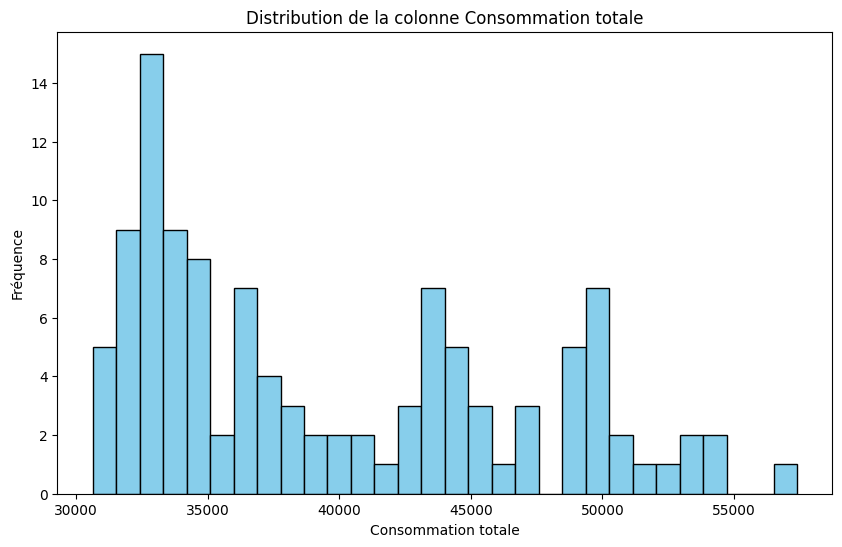

In [39]:
plt.figure(figsize=(10, 6))
plt.hist(data['Consommation totale'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution de la colonne Consommation totale')
plt.xlabel('Consommation totale')
plt.ylabel('Fréquence')
plt.show()

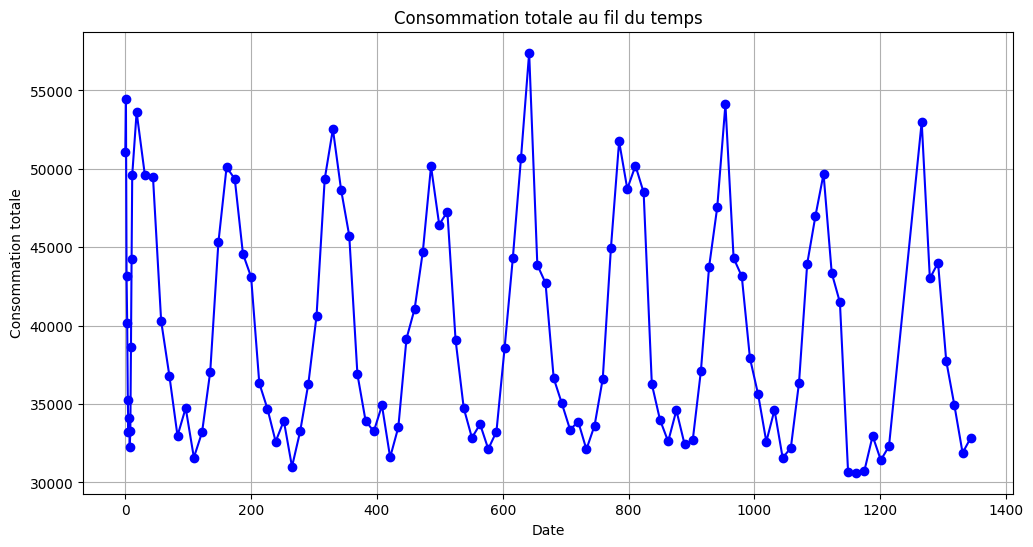

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Consommation totale'], color='blue', marker='o')
plt.title('Consommation totale au fil du temps')
plt.xlabel('Date')
plt.ylabel('Consommation totale')
plt.grid(True)
plt.show()